![Picture for task](https://sun9-12.userapi.com/c857024/v857024004/14606b/EmFLhLUZ8xU.jpg)

### Задание 1. 
Сформировать выборку из 200 чисел. Проверить гипотезу о соответствии выборке теоретическому закону распределения по критерию согласия Пирсона.

$ y = {\sqrt{x}}$

$ a = 1, $ 
$ b = 5 $ 

In [58]:
import random
import math
import numpy as np
import matplotlib.pyplot as plt

In [59]:
a = 1
b = 5
n = 200
M = int(4 * np.log10(n))

In [60]:
#плотность распределения
f = lambda y: y / 2 

#функция распределения
F = lambda y: y ** 2 / 4 - 0.25

In [61]:
x = sorted([random.uniform(a,b) for i in range(n)])
y = sorted([math.sqrt(value) for value in x])

In [62]:
t = np.arange(1, math.sqrt(5), 0.01)

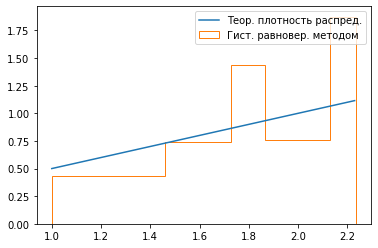

Проверим, выполняется ли контрольное соотношение |1 - sum(p_i)| <= 0.01.
|1 - sum(p_i)| = 2.220446049250313e-16

Chi^2:  4.35545442644046

Кол-во степеней свободы k: 4
Из таблицы хи квадрат выберем значение с уровнем значимости alpha = 0.01 и k = 4

Chi^2(alpha, k) = 20.09

Chi^2(alpha, k) > chi^2, значит, нет оснований отклонять гипотезу о теоретическом законе распределения данной СВ


In [93]:
# число элементов в каждом столбце
v = n // M

plt.plot(t, f(t), label="Теор. плотность распред.")
A = [1] + [y[i * v] for i in range(1, M)] + [math.sqrt(5)]
plt.hist(y, bins = A, density=True, histtype="step", label="Гист. равновер. методом")
plt.legend(loc="best")
plt.show()

p_i = [F(A[i+1]) - F(A[i]) for i in range(0,M)] #теоретическая вероятность попадания случайной величины в i-ый интервал 
print("Проверим, выполняется ли контрольное соотношение |1 - sum(p_i)| <= 0.01.\n|1 - sum(p_i)| =", abs(1 - sum(p_i)))

p = v / n # частота попадания в i-ый интервал
chi_sq = [(p_i[i] - p)**2 / p_i[i] for i in range(0, M)]
chi_sq = sum(chi_sq) * n
print("\nChi^2: ", chi_sq)

k = M - 1 - 0 #Значение S = 0, так как закон распределения не зависит ни от каких параметро

print("\nКол-во степеней свободы k:", k)
print("Из таблицы хи квадрат выберем значение с уровнем значимости alpha = 0.01 и k =", k)
print("\nChi^2(alpha, k) = 20.09")
print("\nChi^2(alpha, k) > chi^2, значит, нет оснований отклонять гипотезу о теоретическом законе распределения данной СВ")



### Задание 2. 
Сформировать выборку из 30 чисел. Проверить гипотезу о соответствии выборке теоретического закона распределения по критерию согласия Колмогорова.


In [97]:
n = 30
M = 5 #sqrt(n)

In [98]:
x = sorted([random.uniform(a,b) for i in range(n)])
y = [math.sqrt(value) for value in x]
var_series = sorted(y)

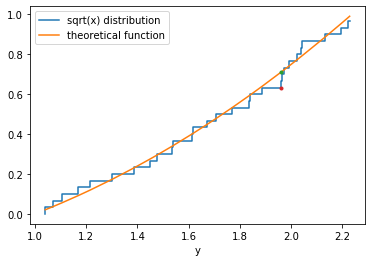

lambda:  0.4229166118977539

Уровень значимости alpha = 0.01. Тогда, доверительная вероятность beta = 1 - alpha = 0.99.
Из табл. функции Колмогорова выберем критическое значение lambda(beta) = 1.63

Т.к. lambda < lambda (beta), то у нас нет оснований отклонять выдвинутую гипотезу.


In [101]:
# эмпирическая функция распределения: count(X < x0) / count(X)
emp_func = lambda X, x0: float(len([num for num in X if num < x0])) / len(X)

emp = [emp_func(y, y0) for y0 in var_series]
theor = [F(val) for val in y]

# delta - максимальная разность между эмпирической и теор. ф распределения
delta, index = max([(abs(theor[i] - emp[i]), i) for i in range(n)])

plt.step(var_series, emp, label="sqrt(x) distribution")
plt.plot(y, theor, label="theoretical function")
plt.plot(var_series[index], theor[index] , ".", var_series[index], emp[index], ".")
plt.legend(loc="best")
plt.xlabel('y')
plt.show()

# вычисляем значение критерия лямбда
lambd = math.sqrt(n) * delta 

print ("lambda: ",lambd)
print("\nУровень значимости alpha = 0.01. Тогда, доверительная вероятность beta = 1 - alpha = 0.99.\nИз табл. функции Колмогорова выберем критическое значение lambda(beta) = 1.63")
print("\nТ.к. lambda < lambda (beta), то у нас нет оснований отклонять выдвинутую гипотезу.")

### Задание 3.
Сформировать выборку из 50 чисел. Проверить гипотезу о соответствии выборке теоретического закона распределения по критерию согласия Мизеса.